# Quality Assessment

In [95]:
import pandas as pd
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
import plotly.graph_objects as go
from collections import Counter

pd.options.mode.chained_assignment = None  # default='warn'

## Import data

In [2]:
input_path = "./../../data/inference/"
output_path = "./../../data/inference/"

decades = list(range(1840, 2000, 10))

In [4]:
mentions_fr = pd.read_pickle(input_path + "mentions_fr.pkl")
mentions_de = pd.read_pickle(input_path + 'mentions_de.pkl')
all_mentions = pd.concat([mentions_fr, mentions_de])
assert(len(all_mentions) == 4482890)

## Sample and Check articles per decade

In [5]:
def sample_per_dec(df, decade, n=5):
    df_dec = df[df['decade']==decade]

    if len(df_dec) < n:
        return df_dec
    else:
        return df_dec.sample(n, random_state=2023)

In [6]:
df_sampled = pd.DataFrame()
for decade in decades:
    df_sampled = pd.concat([df_sampled, 
                            sample_per_dec(mentions_fr, decade),
                            sample_per_dec(mentions_de, decade)])

In [7]:
print(f"For the manual quality check, {len(df_sampled)} articles were sampled.")
df_sampled.head(2)

For the manual quality check, 160 articles were sampled.


,entity,surface,qid,lSentenceOffset,rSentenceOffset,sentence_idx:,lArticleOffset,rArticleOffset,id,article,newspaper,date,year,decade,agency,language,country
4204937,org.ent.pressagency.Havas,Nouv,Q2826560,1,5,50,4427,4431,LNF-1847-09-03-a-i0003:50:1:5:4427:4431:newsag...,LNF-1847-09-03-a-i0003,LNF,1847-09-03,1847,1840,Havas,fr,CH
3879776,org.ent.pressagency.Havas,Id,Q2826560,1,3,21,2243,2245,LNF-1847-09-28-a-i0001:21:1:3:2243:2245:newsag...,LNF-1847-09-28-a-i0001,LNF,1847-09-28,1847,1840,Havas,fr,CH


In [8]:
#prepare data for manual check & export
df_to_check = df_sampled.copy()
df_to_check['impresso_link'] = "impresso-project.ch/app/article/" + df_to_check['article']

df_check = df_to_check[['agency', 'surface', 'sentence_idx:', 'impresso_link', 'id']]

#export
df_to_check.to_csv(output_path + "samples_quality_assessment.csv")

df_to_check.head()

,entity,surface,qid,lSentenceOffset,rSentenceOffset,sentence_idx:,lArticleOffset,rArticleOffset,id,article,newspaper,date,year,decade,agency,language,country,impresso_link
4204937,org.ent.pressagency.Havas,Nouv,Q2826560,1,5,50,4427,4431,LNF-1847-09-03-a-i0003:50:1:5:4427:4431:newsag...,LNF-1847-09-03-a-i0003,LNF,1847-09-03,1847,1840,Havas,fr,CH,impresso-project.ch/app/article/LNF-1847-09-03...
3879776,org.ent.pressagency.Havas,Id,Q2826560,1,3,21,2243,2245,LNF-1847-09-28-a-i0001:21:1:3:2243:2245:newsag...,LNF-1847-09-28-a-i0001,LNF,1847-09-28,1847,1840,Havas,fr,CH,impresso-project.ch/app/article/LNF-1847-09-28...
3819985,org.ent.pressagency.Havas,Hclvétie,Q2826560,1,9,38,5797,5805,LCG-1849-09-22-a-i0003:38:1:9:5797:5805:newsag...,LCG-1849-09-22-a-i0003,LCG,1849-09-22,1849,1840,Havas,fr,CH,impresso-project.ch/app/article/LCG-1849-09-22...
3571526,org.ent.pressagency.unk,. S.,NIL,1,5,22,3407,3411,GDL-1847-06-29-a-i0007:22:1:5:3407:3411:newsag...,GDL-1847-06-29-a-i0007,GDL,1847-06-29,1847,1840,unk,fr,CH,impresso-project.ch/app/article/GDL-1847-06-29...
3702482,org.ent.pressagency.unk,.- E.,NIL,-1,4,11,897,902,LSR-1847-05-08-a-i0009:11:-1:4:897:902:newsag:...,LSR-1847-05-08-a-i0009,LSR,1847-05-08,1847,1840,unk,fr,CH,impresso-project.ch/app/article/LSR-1847-05-08...


### Reimport checked data

In [9]:
df_checked = pd.read_csv(input_path + 'samples_quality_assessment_filled.csv')
print(f"all columns in df: {df_checked.columns}")
df_checked = df_checked.drop(columns=['agency', 'surface', 'sentence_idx:', 'impresso_link', 'dev.impresso_link', 'context']).merge(
    df_sampled, on='id', how='inner'
)
assert len(df_checked) == len(df_sampled)

df_checked.head()

all columns in df: Index(['id', 'agency', 'surface', 'sentence_idx:', 'impresso_link',
       'dev.impresso_link', 'is_correct', 'correct_tag', 'has_brackets',
       'has_hyphen', 'has_dot', 'context'],
      dtype='object')


,id,is_correct,correct_tag,has_brackets,has_hyphen,has_dot,entity,surface,qid,lSentenceOffset,...,lArticleOffset,rArticleOffset,article,newspaper,date,year,decade,agency,language,country
0,LNF-1847-09-03-a-i0003:50:1:5:4427:4431:newsag...,False,O,True,False,True,org.ent.pressagency.Havas,Nouv,Q2826560,1,...,4427,4431,LNF-1847-09-03-a-i0003,LNF,1847-09-03,1847,1840,Havas,fr,CH
1,LNF-1847-09-28-a-i0001:21:1:3:2243:2245:newsag...,False,O,True,False,True,org.ent.pressagency.Havas,Id,Q2826560,1,...,2243,2245,LNF-1847-09-28-a-i0001,LNF,1847-09-28,1847,1840,Havas,fr,CH
2,LCG-1849-09-22-a-i0003:38:1:9:5797:5805:newsag...,False,O,True,False,True,org.ent.pressagency.Havas,Hclvétie,Q2826560,1,...,5797,5805,LCG-1849-09-22-a-i0003,LCG,1849-09-22,1849,1840,Havas,fr,CH
3,GDL-1847-06-29-a-i0007:22:1:5:3407:3411:newsag...,True,NaN,False,True,True,org.ent.pressagency.unk,. S.,NIL,1,...,3407,3411,GDL-1847-06-29-a-i0007,GDL,1847-06-29,1847,1840,unk,fr,CH
4,LSR-1847-05-08-a-i0009:11:-1:4:897:902:newsag:...,False,articleauthor,True,False,True,org.ent.pressagency.unk,.- E.,NIL,-1,...,897,902,LSR-1847-05-08-a-i0009,LSR,1847-05-08,1847,1840,unk,fr,CH


### Stats: Quality of the classification

In [10]:
print(f"correctly classified: {round(len(df_checked[df_checked['is_correct']]) / len(df_checked) * 100)} %")
df_checked_19th = df_checked[df_checked['decade'] < 1900]
df_checked_20th = df_checked[df_checked['decade'] >= 1900]
print(f"-> 19th century: {round(len(df_checked_19th[df_checked_19th['is_correct']]) / len(df_checked_19th) * 100)} %")
print(f"-> 20th century: {round(len(df_checked_20th[df_checked_20th['is_correct']]) / len(df_checked_20th) * 100)} %")

correctly classified: 62 %
-> 19th century: 27 %
-> 20th century: 83 %


In [11]:
df_checked_dec = df_checked[['decade', 'language', 'is_correct', 'has_brackets', 'has_hyphen', 'has_dot']].groupby(by=['decade', 'language']).mean().reset_index()
df_checked_dec[['is_correct', 'has_brackets', 'has_hyphen', 'has_dot']] = df_checked_dec[['is_correct', 'has_brackets', 'has_hyphen', 'has_dot']] * 100
df_checked_dec.head()

,decade,language,is_correct,has_brackets,has_hyphen,has_dot
0,1840,de,0.0,0.0,20.0,20.0
1,1840,fr,20.0,80.0,20.0,100.0
2,1850,de,0.0,0.0,0.0,80.0
3,1850,fr,0.0,100.0,20.0,100.0
4,1860,de,0.0,40.0,0.0,80.0


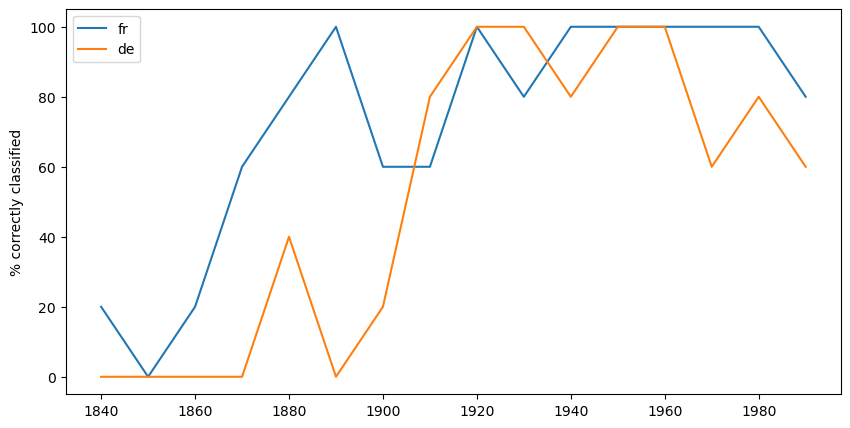

In [12]:
#over time
fig, ax = plt.subplots(1, figsize=(10,5))

ax.plot(decades, df_checked_dec.loc[df_checked_dec['language'] == 'fr', 'is_correct'], label='fr')
ax.plot(decades, df_checked_dec.loc[df_checked_dec['language'] == 'de', 'is_correct'], label='de')
ax.legend()
ax.set_ylabel('% correctly classified')
plt.show()

### Check out wrongly classified tokens

In [13]:
wrongly_classified = df_checked[~df_checked['is_correct']]
wrongly_classified.head()

,id,is_correct,correct_tag,has_brackets,has_hyphen,has_dot,entity,surface,qid,lSentenceOffset,...,lArticleOffset,rArticleOffset,article,newspaper,date,year,decade,agency,language,country
0,LNF-1847-09-03-a-i0003:50:1:5:4427:4431:newsag...,False,O,True,False,True,org.ent.pressagency.Havas,Nouv,Q2826560,1,...,4427,4431,LNF-1847-09-03-a-i0003,LNF,1847-09-03,1847,1840,Havas,fr,CH
1,LNF-1847-09-28-a-i0001:21:1:3:2243:2245:newsag...,False,O,True,False,True,org.ent.pressagency.Havas,Id,Q2826560,1,...,2243,2245,LNF-1847-09-28-a-i0001,LNF,1847-09-28,1847,1840,Havas,fr,CH
2,LCG-1849-09-22-a-i0003:38:1:9:5797:5805:newsag...,False,O,True,False,True,org.ent.pressagency.Havas,Hclvétie,Q2826560,1,...,5797,5805,LCG-1849-09-22-a-i0003,LCG,1849-09-22,1849,1840,Havas,fr,CH
4,LSR-1847-05-08-a-i0009:11:-1:4:897:902:newsag:...,False,articleauthor,True,False,True,org.ent.pressagency.unk,.- E.,NIL,-1,...,897,902,LSR-1847-05-08-a-i0009,LSR,1847-05-08,1847,1840,unk,fr,CH
5,WHD-1845-02-07-a-i0006:53:0:7:2441:2448:newsag...,False,articleauthor,False,False,False,org.ent.pressagency.Havas,Desaaas,Q2826560,0,...,2441,2448,WHD-1845-02-07-a-i0006,WHD,1845-02-07,1845,1840,Havas,de,CH


In [14]:
print(f"Percent of wrongly classified mentions which...\n{wrongly_classified[['has_brackets', 'has_hyphen', 'has_dot']].mean() * 100}")

print(f"Percent of wrongly classified mentions which has neither of them: {100 - round(wrongly_classified[['has_brackets', 'has_hyphen', 'has_dot']].any(axis=1).mean() * 100)} %")

Percent of wrongly classified mentions which...
has_brackets    52.459016
has_hyphen       6.557377
has_dot         63.934426
dtype: float64
Percent of wrongly classified mentions which has neither of them: 23 %


In [15]:
wrongly_classified['agency'].unique()

array(['Havas', 'unk', 'ag', 'SPK-SMP', 'Reuters', 'Wolff', 'ATS-SDA',
       'DPA', 'AFP', 'UP-UPI'], dtype=object)

#### Sankey Diagram

In [16]:
correct_tokens = list(wrongly_classified['correct_tag'].unique())
wrong_tokens =  [token + "_" for token in wrongly_classified['agency'].unique()]
all_tokens = correct_tokens + wrong_tokens
tokens_dict = dict(zip(all_tokens, list(range(len(all_tokens)))))
print(tokens_dict)

freq_wrong_class = Counter(zip(wrongly_classified['correct_tag'], wrongly_classified['agency']))
print(freq_wrong_class)
source = [tokens_dict[keys[0]] for keys in freq_wrong_class.keys()]
target = [tokens_dict[keys[1]+"_"] for keys in freq_wrong_class.keys()]
value = list(freq_wrong_class.values())

{'O': 0, 'articleauthor': 1, 'Havas': 2, 'unk': 3, 'Reuters': 4, 'Wolff': 5, 'Havas_': 6, 'unk_': 7, 'ag_': 8, 'SPK-SMP_': 9, 'Reuters_': 10, 'Wolff_': 11, 'ATS-SDA_': 12, 'DPA_': 13, 'AFP_': 14, 'UP-UPI_': 15}
Counter({('O', 'unk'): 13, ('O', 'Havas'): 9, ('O', 'SPK-SMP'): 6, ('O', 'ATS-SDA'): 6, ('articleauthor', 'unk'): 4, ('O', 'ag'): 4, ('articleauthor', 'Havas'): 3, ('O', 'Reuters'): 3, ('Wolff', 'Havas'): 3, ('O', 'DPA'): 2, ('O', 'AFP'): 2, ('O', 'Wolff'): 1, ('Havas', 'unk'): 1, ('unk', 'Havas'): 1, ('Reuters', 'unk'): 1, ('articleauthor', 'ATS-SDA'): 1, ('O', 'UP-UPI'): 1})


In [17]:
fig = go.Figure(data=[go.Sankey(
    node = dict(
      pad = 20,
      thickness = 30,
      line = dict(color = "black", width = 0.6),
      label = list(tokens_dict.keys()), #["A1", "A2", "B1", "B2", "C1", "C2"],
      color = "blue"
    ),
    link = dict(
      source = source, # indices correspond to labels, eg A1, A2, A1, B1, ...
      target = target,
      value = value
  ))])

labels = "Correct Label" + 35 * "\t" + "Wrong Label"

fig.update_layout(title_text=labels, font_size=20, autosize=False,
    width=800,
    height=600,)
fig.show()

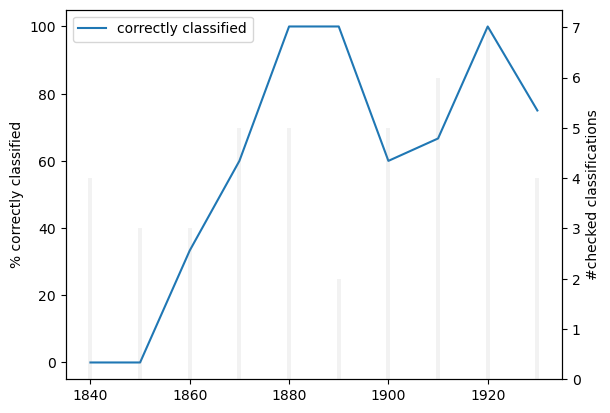

In [18]:
#check case of Havas per time
havas = df_checked[df_checked['agency'] == "Havas"]
havas_grouped = havas[['decade', 'is_correct', 'agency']].groupby('decade').agg({'is_correct': 'mean', 'agency': 'count'})
havas_grouped['is_correct'] = havas_grouped['is_correct'] * 100

fig, ax = plt.subplots()
ax1 = ax.twinx()

lns1 = ax.plot(havas_grouped.index, havas_grouped['is_correct'], label='correctly classified')
lns2 = ax1.bar(havas_grouped.index, havas_grouped['agency'], color='grey', alpha=0.1, label='#checked classifications')
ax.set_ylabel("% correctly classified")
ax1.set_ylabel("#checked classifications")
ax.legend()
plt.show()

In [19]:
# check language for wrongly classified Wolff tokens
wrongly_classified[wrongly_classified['correct_tag'] == "Wolff"]

,id,is_correct,correct_tag,has_brackets,has_hyphen,has_dot,entity,surface,qid,lSentenceOffset,...,lArticleOffset,rArticleOffset,article,newspaper,date,year,decade,agency,language,country
71,EXP-1916-04-14-a-i0115:3:0:5:320:325:newsag:be...,False,Wolff,False,False,False,org.ent.pressagency.Havas,Wolff,Q2826560,0,...,320,325,EXP-1916-04-14-a-i0115,EXP,1916-04-14,1916,1910,Havas,fr,CH
74,JDG-1916-06-09-a-i0029:46:1:6:6067:6072:newsag...,False,Wolff,True,False,True,org.ent.pressagency.Havas,Wolff,Q2826560,1,...,6067,6072,JDG-1916-06-09-a-i0029,JDG,1916-06-09,1916,1910,Havas,fr,CH
92,EXP-1930-07-28-a-i0098:0:42:47:42:47:newsag:be...,False,Wolff,True,False,True,org.ent.pressagency.Havas,Wolff,Q2826560,42,...,42,47,EXP-1930-07-28-a-i0098,EXP,1930-07-28,1930,1930,Havas,fr,CH


## Check use of "unk" token

In [20]:
df_unk = all_mentions[all_mentions['agency'] == "unk"]

In [21]:
print(f"#articles classified as 'unk': {len(df_unk)} ({round(len(df_unk)/len(all_mentions)*100)}% of all classified agency mentions)")

#articles classified as 'unk': 177922 (4% of all classified agency mentions)


In [22]:
df_unk['surface'].value_counts()[:50]

. P.             12656
Fournier          9027
Bureau            7708
FN                7316
D. N. B.          7163
. T. S            3478
Telunion          3332
Korrespondenz     3053
. N. B.           2981
Cosmo             2927
C. P.             2871
az                2869
Agence            2779
Kp                1737
KP                1660
Belga             1659
S.                1642
. S.              1474
SR                1434
APRIL             1387
Agency            1384
havas             1338
. T. S.           1259
Amtlich           1198
. T.              1173
Uniteb            1120
Agenzia           1054
. B.               951
GB                 920
ry                 902
S. Sp.             881
SBolff             849
Sp                 844
TASS               812
. P. S.            787
B. C. V.           747
S. P.              714
CND                688
sr                 687
Spx                684
ugu                648
ADN                645
P. T. S.           616
KIPA       

In [23]:
df_unk[df_unk['surface']=="FN"].head()

,entity,surface,qid,lSentenceOffset,rSentenceOffset,sentence_idx:,lArticleOffset,rArticleOffset,id,article,newspaper,date,year,decade,agency,language,country
252,org.ent.pressagency.unk,FN,NIL,2,4,2,324,326,FZG-1981-11-25-a-i0028:2:2:4:324:326:newsag:be...,FZG-1981-11-25-a-i0028,FZG,1981-11-25,1981,1980,unk,de,CH
2718,org.ent.pressagency.unk,FN,NIL,2,4,1,125,127,FZG-1992-06-19-a-i0169:1:2:4:125:127:newsag:be...,FZG-1992-06-19-a-i0169,FZG,1992-06-19,1992,1990,unk,de,CH
2779,org.ent.pressagency.unk,FN,NIL,2,4,10,1065,1067,FZG-1991-08-05-a-i0056:10:2:4:1065:1067:newsag...,FZG-1991-08-05-a-i0056,FZG,1991-08-05,1991,1990,unk,de,CH
3164,org.ent.pressagency.unk,FN,NIL,2,4,31,5968,5970,FZG-1986-04-21-a-i0094:31:2:4:5968:5970:newsag...,FZG-1986-04-21-a-i0094,FZG,1986-04-21,1986,1980,unk,de,CH
3320,org.ent.pressagency.unk,FN,NIL,2,4,15,1060,1062,FZG-1988-07-21-a-i0092:15:2:4:1060:1062:newsag...,FZG-1988-07-21-a-i0092,FZG,1988-07-21,1988,1980,unk,de,CH


In [24]:
df_unk.loc[df_unk['surface']=="FN", 'newspaper'].unique()

array(['FZG'], dtype=object)

-> abbreviation for "Freiburger Nachrichten"

In [25]:
df_unk[df_unk['surface']==". P."].head(10)

,entity,surface,qid,lSentenceOffset,rSentenceOffset,sentence_idx:,lArticleOffset,rArticleOffset,id,article,newspaper,date,year,decade,agency,language,country
1240,org.ent.pressagency.unk,. P.,NIL,65,69,0,65,69,IMP-1960-05-18-a-i0043:0:65:69:65:69:newsag:be...,IMP-1960-05-18-a-i0043,IMP,1960-05-18,1960,1960,unk,fr,CH
2015,org.ent.pressagency.unk,. P.,NIL,70,74,0,70,74,JDG-1957-08-19-a-i0076:0:70:74:70:74:newsag:be...,JDG-1957-08-19-a-i0076,JDG,1957-08-19,1957,1950,unk,fr,CH
2813,org.ent.pressagency.unk,. P.,NIL,-1,3,44,8784,8788,LLE-1974-11-21-a-i0150:44:-1:3:8784:8788:newsa...,LLE-1974-11-21-a-i0150,LLE,1974-11-21,1974,1970,unk,fr,CH
4503,org.ent.pressagency.unk,. P.,NIL,4,8,10,886,890,GDL-1942-04-21-a-i0054:10:4:8:886:890:newsag:b...,GDL-1942-04-21-a-i0054,GDL,1942-04-21,1942,1940,unk,fr,CH
4737,org.ent.pressagency.unk,. P.,NIL,4,8,7,393,397,JDG-1952-08-08-a-i0108:7:4:8:393:397:newsag:be...,JDG-1952-08-08-a-i0108,JDG,1952-08-08,1952,1950,unk,fr,CH
4822,org.ent.pressagency.unk,. P.,NIL,315,319,3,2929,2933,GDL-1952-09-12-a-i0083:3:315:319:2929:2933:new...,GDL-1952-09-12-a-i0083,GDL,1952-09-12,1952,1950,unk,fr,CH
4873,org.ent.pressagency.unk,. P.,NIL,4,8,6,572,576,JDG-1948-10-15-a-i0022:6:4:8:572:576:newsag:be...,JDG-1948-10-15-a-i0022,JDG,1948-10-15,1948,1940,unk,fr,CH
5297,org.ent.pressagency.unk,. P.,NIL,43,47,0,43,47,GDL-1950-09-11-a-i0090:0:43:47:43:47:newsag:be...,GDL-1950-09-11-a-i0090,GDL,1950-09-11,1950,1950,unk,fr,CH
5298,org.ent.pressagency.unk,. P.,NIL,53,57,4,395,399,GDL-1950-09-11-a-i0090:4:53:57:395:399:newsag:...,GDL-1950-09-11-a-i0090,GDL,1950-09-11,1950,1950,unk,fr,CH
6032,org.ent.pressagency.unk,. P.,NIL,97,101,1,173,177,EXP-1957-06-20-a-i0005:1:97:101:173:177:newsag...,EXP-1957-06-20-a-i0005,EXP,1957-06-20,1957,1950,unk,fr,CH


- IMP-1960-05-18-a-i0043: C.P. -> Correspondance Particulière
- JDG-1957-08-19-a-i0076: D. P. A. -> DPA
- LLE-1974-11-21-a-i0150:  ( J . P . ) -> articleauthor (?)
- GDL-1942-04-21-a-i0054: (C. P.) -> Correspondance Particulière
- JDG-1952-08-08-a-i0108: (C. P.) -> Correspondance Particulière
- GDL-1952-09-12-a-i0083: (C. P.) -> Correspondance Particulière
- JDG-1948-10-15-a-i0022: (S. P.) -> unk
- GDL-1950-09-11-a-i0090: (C. P.) -> Correspondance Particulière
- GDL-1950-09-11-a-i0090: (C. P.) -> Correspondance Particulière
- EXP-1957-06-20-a-i0005: (D. P. A.) -> DPA

-> part of (C.P.), correspondance particulière (?) - often appears with local news

<Axes: xlabel='decade', ylabel='count'>

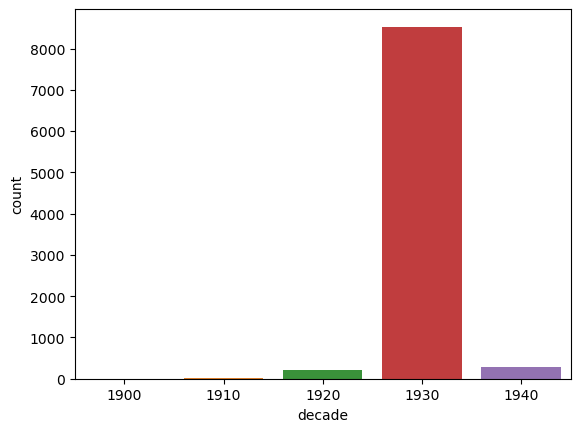

In [26]:
#Agence Fournier: 1874 - 1944
sns.countplot(df_unk[df_unk['surface'] == 'Fournier'], x='decade')

<Axes: xlabel='decade', ylabel='count'>

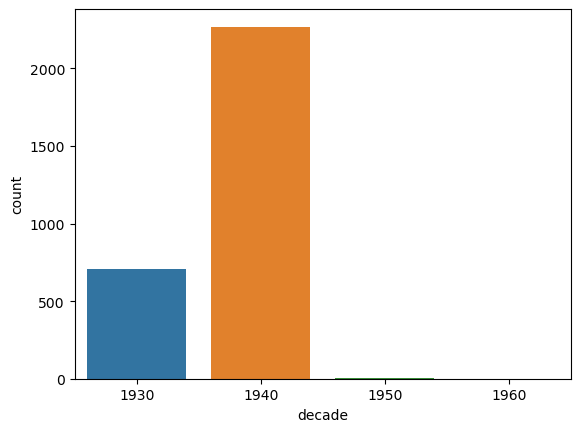

In [27]:
#DNB
sns.countplot(df_unk[df_unk['surface'] == '. N. B.'], x='decade')

<Axes: xlabel='decade', ylabel='count'>

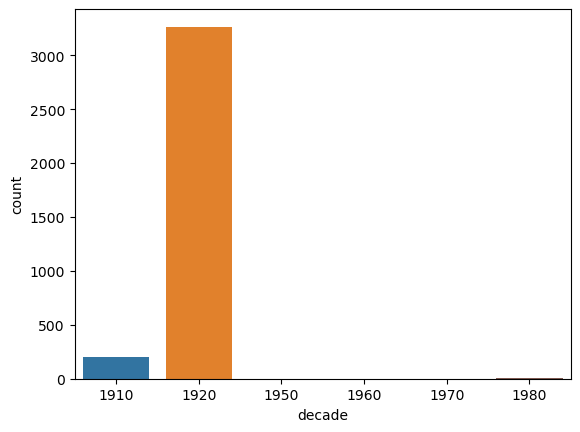

In [28]:
sns.countplot(df_unk[df_unk['surface'] == '. T. S'], x='decade')

## Check ratio of noisy mentions

In [29]:
print(f"#unique tokens (surface) classified as agency: {len(all_mentions['surface'].unique())}")
print(f"Most common ones:\n{all_mentions['surface'].value_counts()[:50]}")

#unique tokens (surface) classified as agency: 36496
Most common ones:
AFP             670833
ATS             581200
Reuter          379627
ats             356665
ag.             283871
Havas           267151
sda             196004
afp             159931
AP              155882
ap              105499
United Press     73433
A. F. P.         64703
UPI              58647
Wolff            49105
Afp              47740
ag               44696
ATP              44290
Kipa             39263
reuter           37811
dpa              34564
DPA              32148
Exchange         29572
DNB              28448
spk              27295
United Preß      25449
Ats              24239
Ap               19434
ag)              15306
. P.             13157
Preß             12908
United           12489
UP               11039
FN                9389
Agence            9173
Fournier          9089
U. P.             8905
A. T. S.          8465
Bureau            7708
Ag                7607
si                7470
upi      

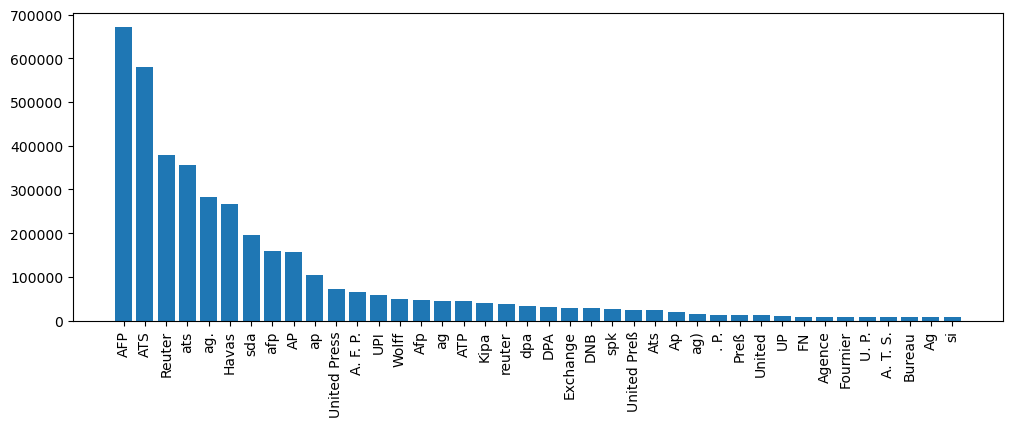

In [30]:
#plot most common surfaces
most_common_surface = all_mentions['surface'].value_counts()[:40]

fig, ax = plt.subplots(1, figsize=(12,4))

ax.bar(most_common_surface.index, most_common_surface.values)
plt.xticks(rotation=90)
plt.show()

In [31]:
all_mentions[all_mentions['surface']=="ATP"].sample(5, random_state=2023)

,entity,surface,qid,lSentenceOffset,rSentenceOffset,sentence_idx:,lArticleOffset,rArticleOffset,id,article,newspaper,date,year,decade,agency,language,country
2296437,org.ent.pressagency.AFP,ATP,Q40464,64,67,0,64,67,EXP-2010-11-11-a-i0144:0:64:67:64:67:newsag:be...,EXP-2010-11-11-a-i0144,EXP,2010-11-11,2010,2010,AFP,fr,CH
3346332,org.ent.pressagency.AFP,ATP,Q40464,82,85,2,225,228,LLE-2010-12-24-a-i0127:2:82:85:225:228:newsag:...,LLE-2010-12-24-a-i0127,LLE,2010-12-24,2010,2010,AFP,fr,CH
2499846,org.ent.pressagency.AFP,ATP,Q40464,57,60,1,172,175,EXP-2016-04-20-a-i0204:1:57:60:172:175:newsag:...,EXP-2016-04-20-a-i0204,EXP,2016-04-20,2016,2010,AFP,fr,CH
3812651,org.ent.pressagency.AFP,ATP,Q40464,2,5,5,281,284,IMP-1948-09-25-a-i0153:5:2:5:281:284:newsag:be...,IMP-1948-09-25-a-i0153,IMP,1948-09-25,1948,1940,AFP,fr,CH
2240865,org.ent.pressagency.AFP,ATP,Q40464,19,22,1,203,206,EXP-2007-09-12-a-i0205:1:19:22:203:206:newsag:...,EXP-2007-09-12-a-i0205,EXP,2007-09-12,2007,2000,AFP,fr,CH


In [32]:
all_mentions.loc[all_mentions['surface']=="ATP", 'agency'].value_counts()

AFP        44268
ATS-SDA       21
unk            1
Name: agency, dtype: int64

- EXP-2010-11-11-a-i0144: Association of Tennis Professionals (ATP)
- LLE-2010-12-24-a-i0127: Association of Tennis Professionals (ATP)
- EXP-2016-04-20-a-i0204: Association of Tennis Professionals (ATP)
- IMP-1948-09-25-a-i0153: AFP
- EXP-2007-09-12-a-i0205: Association of Tennis Professionals (ATP)

<Axes: xlabel='decade', ylabel='count'>

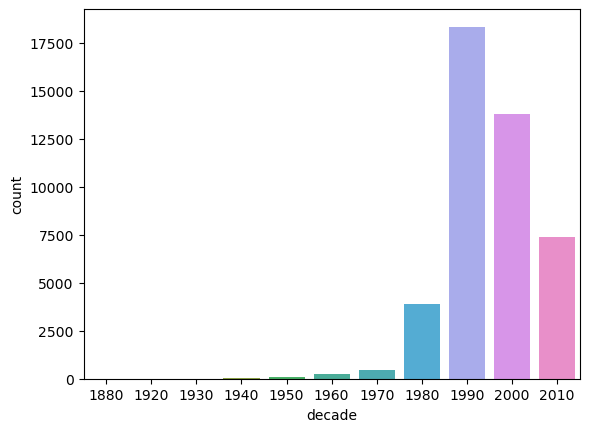

In [33]:
sns.countplot(all_mentions[all_mentions['surface']=="ATP"], x='decade')

-> Association of Tennis Professionals (ATP) was founded in 1972

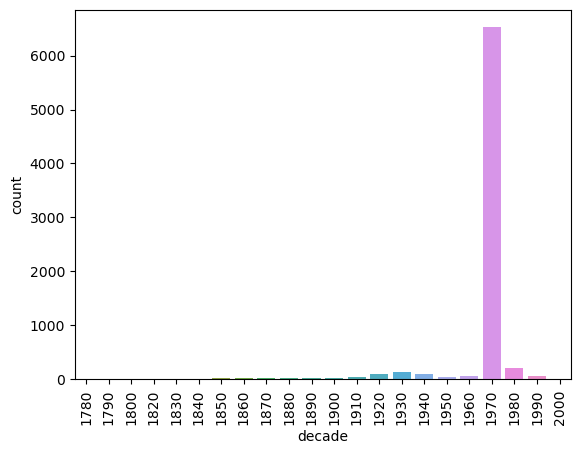

In [34]:
sns.countplot(all_mentions[all_mentions['surface']=="si"], x='decade')
plt.xticks(rotation=90)
plt.show()

In [35]:
all_mentions.loc[all_mentions['surface']=="si", 'agency'].value_counts()

ATS-SDA    7434
Havas        21
AP           12
AFP           1
Wolff         1
unk           1
Name: agency, dtype: int64

In [36]:
all_mentions.loc[all_mentions['surface']=="si"].head()

,entity,surface,qid,lSentenceOffset,rSentenceOffset,sentence_idx:,lArticleOffset,rArticleOffset,id,article,newspaper,date,year,decade,agency,language,country
46652,org.ent.pressagency.Havas,si,Q2826560,284,286,14,2746,2748,IMP-1994-07-16-a-i0066:14:284:286:2746:2748:ne...,IMP-1994-07-16-a-i0066,IMP,1994-07-16,1994,1990,Havas,fr,CH
100650,org.ent.pressagency.AP,si,Q40469,38,40,19,2711,2713,IMP-1992-06-19-a-i0127:19:38:40:2711:2713:news...,IMP-1992-06-19-a-i0127,IMP,1992-06-19,1992,1990,AP,fr,CH
542694,org.ent.pressagency.ATS-SDA,si,Q430109,189,191,12,2875,2877,EXP-1993-08-14-a-i0161:12:189:191:2875:2877:ne...,EXP-1993-08-14-a-i0161,EXP,1993-08-14,1993,1990,ATS-SDA,fr,CH
575380,org.ent.pressagency.AP,si,Q40469,288,290,28,3167,3169,IMP-1992-02-19-a-i0085:28:288:290:3167:3169:ne...,IMP-1992-02-19-a-i0085,IMP,1992-02-19,1992,1990,AP,fr,CH
692312,org.ent.pressagency.Havas,si,Q2826560,4,6,166,7292,7294,IMP-1994-05-09-a-i0077:166:4:6:7292:7294:newsa...,IMP-1994-05-09-a-i0077,IMP,1994-05-09,1994,1990,Havas,fr,CH


- IMP-1994-07-16-a-i0066: (si)
- IMP-1992-06-19-a-i0127: (ap/si)
- EXP-1993-08-14-a-i0161: / si-ats
- IMP-1992-02-19-a-i0085: (ap / si)
- IMP-1994-05-09-a-i0077: (si)

-> Schweizer Sportnachrichtenagentur Sportinformation (SI) (founded 1922)


### Rough ratio of noisy mentions

In [37]:
#check noisy mentions manually
all_mentions['surface'].value_counts()[:50].index

Index(['AFP', 'ATS', 'Reuter', 'ats', 'ag.', 'Havas', 'sda', 'afp', 'AP', 'ap',
       'United Press', 'A. F. P.', 'UPI', 'Wolff', 'Afp', 'ag', 'ATP', 'Kipa',
       'reuter', 'dpa', 'DPA', 'Exchange', 'DNB', 'spk', 'United Preß', 'Ats',
       'Ap', 'ag)', '. P.', 'Preß', 'United', 'UP', 'FN', 'Agence', 'Fournier',
       'U. P.', 'A. T. S.', 'Bureau', 'Ag', 'si', 'upi', 'D. N. B.', 'SDA',
       'reuters', 'Haoas', 'AfS', 'Agentur', 'ddp', 'sp', 'Stefani'],
      dtype='object')

In [38]:
not_noisy_ag_surface = ['AFP', 'ATS', 'Reuter', 'ats', 'ag.', 'Havas', 'sda', 'afp', 'AP', 'ap',
       'United Press', 'A. F. P.', 'UPI', 'Wolff', 'Afp', 'ag', 'Kipa',
       'reuter', 'dpa', 'DPA', 'Exchange', 'DNB', 'spk', 'United Preß', 'Ats',
       'Ap', 'ag)', 'Preß', 'United', 'UP', 'Fournier', 'Agence',
       'U. P.', 'A. T. S.', 'Bureau', 'Ag', 'upi', 'D. N. B.', 'SDA',
       'reuters', 'Agentur', 'ddp', 
 'Stefani',
 'Tass',
 'Europapreß',
 'télégraphique',
 'up',
 'Agence télégraphique suisse',
 'Telunion',
 'Korrespondenz',
 'C. P.',
 'Belga',
 'télégraphique suisse',
 'Press',
 'havas',
 'APA',
 'A. F. P',
 'Ansa',
 'Ag.',
 'Taß',
 'Agency',
 'Ofi',
 'REUTER',
 'A. T. S',
 'Interinf',
 'Agenzia',
 'Extel',
 'D. P. A.',
 'TASS',
 'Nouvelle',
 'Associated',
 'Telepress',
 'apa',
 'Keystone',
 'ANSA',
 'KIPA',
 'P. T. S.',
 'Dpa',
 'Agence télégraphique',
 ]

In [39]:
print(f"Most frequent noisy/unknown mentions:\n{[surface for surface in all_mentions['surface'].value_counts()[:200].index if surface not in not_noisy_ag_surface]},\nFrequency of last checked item: {all_mentions['surface'].value_counts()[200]}")

Most frequent noisy/unknown mentions:
['ATP', '. P.', 'FN', 'si', 'Haoas', 'AfS', 'sp', 'Ilavas', 'Hauas', 'ag(', 'Sp', 'az', 'suivre', '. T. S', 'DNV', 'llavas', 'at', 'ag,', 'apx', '. N. B.', 'Cosmo', 'DP', '. P', 'agr.', 'GB', 'fdp', 'resp', 'Reuler', 'svp', 'Resp', 'af', 'Rey', 'sdi', 'Kp', 'ju', 'Beuter', 'KP', 'dds', 'APS', 'S.', 'AT', '. S.', 'Bavas', 'pk', 'APRIL', 'AFS', 'pw', 'Europapreh', 'SR', '. T.', 'A. S.', 'APP', 'A. T.', '. T. S.', 'Saas', 'Hanas', 'bp', 'Hava', 'Amtlich', 'DRB', 'Uniteb', 'TS', 'sr', 'ASL', 'ADN', 'AF', '. B.', 'A TS', 'Rex', 'ry', 'Renier', 'U. P', 'spg', 'span', 'S. Sp.', 'ATE', 'sw', 'SBolff', 'APEI', 'At', 'APIC', 'United Preh', '. P. S.', 'Haras', 'B. C. V.', 'APG', 'pp', 'Spx', 'DR', 'CND', 'Uniled Press', 'S. P.', 'tp', 'APF', 'API', 'stv', 'DK', 'KPI', 'DNN', 'ATÇ', 'AWP', 'ugu', 'IDNB', 'A. B.', 'SNB', 'Europapretz', 'A.', 'C. P. S.', 'AJt', 'Reu', 'T. P.', 'A. R.', 'P.', 'A. T', 'alp', 'APD', 'Libertas', 'DIE', 'CPS', 'Af', 'Bp'],
Frequency 

In [40]:
df_noisy_surface = all_mentions[~all_mentions['surface'].isin(not_noisy_ag_surface)]

print(f"Rough ratio of noisy mentions: {round(len(df_noisy_surface) / len(all_mentions) *100, 2)}%")
print(f"Rough ratio of noisy mentions, unk excluded: {round(len(df_noisy_surface[df_noisy_surface['agency'] != 'unk']) / len(all_mentions) *100, 2)}%")
print(f"Rough ratio of noisy mentions, unk excluded, FR:\
    {round(len(df_noisy_surface[(df_noisy_surface['language'] == 'fr') & (df_noisy_surface['agency'] != 'unk')]) / len(mentions_fr) *100, 2)}%")
print(f"Rough ratio of noisy mentions, unk excluded, DE:\
    {round(len(df_noisy_surface[(df_noisy_surface['language'] == 'de') & (df_noisy_surface['agency'] != 'unk')]) / len(mentions_de) *100, 2)}%")

Rough ratio of noisy mentions: 10.63%
Rough ratio of noisy mentions, unk excluded: 7.69%
Rough ratio of noisy mentions, unk excluded, FR:    6.4%
Rough ratio of noisy mentions, unk excluded, DE:    9.96%


-> more or less the same as in annotated set, German a bit more

## The token ag.

In [45]:
all_mentions[all_mentions['agency'] == 'ag'].sample(10, random_state=1)

,entity,surface,qid,lSentenceOffset,rSentenceOffset,sentence_idx:,lArticleOffset,rArticleOffset,id,article,newspaper,date,year,decade,agency,language,country
3223402,org.ent.pressagency.ag,ag.,NIL,-1,2,8,4761,4764,FZG-1951-09-29-a-i0040:8:-1:2:4761:4764:newsag...,FZG-1951-09-29-a-i0040,FZG,1951-09-29,1951,1950,ag,de,CH
2262562,org.ent.pressagency.ag,ag-,NIL,26,29,31,2467,2470,FZG-1990-03-07-a-i0159:31:26:29:2467:2470:news...,FZG-1990-03-07-a-i0159,FZG,1990-03-07,1990,1990,ag,de,CH
4320085,org.ent.pressagency.ag,"ag,",NIL,-1,2,191,21848,21851,NZZ-1944-01-27-d-i0001:191:-1:2:21848:21851:ne...,NZZ-1944-01-27-d-i0001,NZZ,1944-01-27,1944,1940,ag,de,CH
4567015,org.ent.pressagency.ag,ag.,NIL,-1,2,1,63,66,FZG-1965-04-09-a-i0102:1:-1:2:63:66:newsag:ber...,FZG-1965-04-09-a-i0102,FZG,1965-04-09,1965,1960,ag,de,CH
728842,org.ent.pressagency.ag,ag,NIL,36,38,0,36,38,DTT-1959-09-20-a-i0057:0:36:38:36:38:newsag:be...,DTT-1959-09-20-a-i0057,DTT,1959-09-20,1959,1950,ag,de,CH
3032765,org.ent.pressagency.ag,ag.,NIL,-1,2,54,5741,5744,FZG-1965-12-20-a-i0017:54:-1:2:5741:5744:newsa...,FZG-1965-12-20-a-i0017,FZG,1965-12-20,1965,1960,ag,de,CH
3950711,org.ent.pressagency.ag,ag.,NIL,-1,2,80,8037,8040,FZG-1958-10-20-a-i0051:80:-1:2:8037:8040:newsa...,FZG-1958-10-20-a-i0051,FZG,1958-10-20,1958,1950,ag,de,CH
1626610,org.ent.pressagency.ag,ag.,NIL,-1,2,36,8288,8291,FZG-1925-03-06-a-i0004:36:-1:2:8288:8291:newsa...,FZG-1925-03-06-a-i0004,FZG,1925-03-06,1925,1920,ag,de,CH
1855841,org.ent.pressagency.ag,ag,NIL,32,34,92,13955,13957,DTT-1965-12-19-a-i0070:92:32:34:13955:13957:ne...,DTT-1965-12-19-a-i0070,DTT,1965-12-19,1965,1960,ag,de,CH
2069783,org.ent.pressagency.ag,ag.,NIL,-1,2,134,11496,11499,FZG-1940-12-19-a-i0028:134:-1:2:11496:11499:ne...,FZG-1940-12-19-a-i0028,FZG,1940-12-19,1940,1940,ag,de,CH


In [46]:
all_mentions[all_mentions['agency'] == 'ag'].sample(10, random_state=1)['article']

3223402    FZG-1951-09-29-a-i0040
2262562    FZG-1990-03-07-a-i0159
4320085    NZZ-1944-01-27-d-i0001
4567015    FZG-1965-04-09-a-i0102
728842     DTT-1959-09-20-a-i0057
3032765    FZG-1965-12-20-a-i0017
3950711    FZG-1958-10-20-a-i0051
1626610    FZG-1925-03-06-a-i0004
1855841    DTT-1965-12-19-a-i0070
2069783    FZG-1940-12-19-a-i0028
Name: article, dtype: object

- FZG-1951-09-29-a-i0040: ag - Switzerland
    - Bern , 29 . Sept . **ag .** Der bernische Regierungsrat nahm Kenntnis von einem Schreiben der eidg . Bundeskanzlei 
- FZG-1990-03-07-a-i0159: FP
    - Von Beginn weg spielte es **ag-** Bern : Tosio ; Leuenberger , Rauch ; Beutler gressiv auf den Mann
- NZZ-1944-01-27-d-i0001: FP
    - klar durchhörbare Toug^slalt gewiuueu ließ , '.!>;! **ag ,** ^ril .! Bru » i « seine » späleren -inionie » sich ,', u ei » e ,» selb »
- FZG-1965-04-09-a-i0102: ag + DPA
    - Berlin , 8 . April , **ag .** ( DPA ) Ueberraschend wurde zum erstenmal die Fernverkehrsstraße
- DTT-1959-09-20-a-i0057: ag - Switzerland
    - Sitten , **( ag )** In einem Stollen im Val de Bagnes , wo zwei Arbeiter und ein Vorarbeiter beschäftigt waren , ist ein Felsblock
- FZG-1965-12-20-a-i0017: ag - Switzerland
    - Messe für die über Weihnachten heimkehrenden Gastarbeiter , **ag .** Im Kollegium San . Antonio in Locarno hielt ein Priester der bischöflichen Mission
- FZG-1958-10-20-a-i0051: ag - Switzerland
    - Brüssel , 19 . Okt . **ag .** Die Weltausstellung Brüssel 1958 hat am Sonntag ihre Pforten geschlossen . Es ist offensichtlich noch zu früh , um eine —• - auch nur annähernde — Bilanz der Resultate der schweizerischen Beteiligung an der Ausstellung zu ziehen .
- FZG-1925-03-06-a-i0004: ag + Havas
    - Lonbon , 5 . März . **ag .** •( Havas . ) In einer Rede , bie Viscount Grey am Mittwoch
- DTT-1965-12-19-a-i0070: ag - Switzerland
    - Lausanne , **( ag )** Wie in Lausanne bekanntgegeben wurde , ist die Schweizerische Landesausstellung 1964 
- FZG-1940-12-19-a-i0028: ag - foreign news
    - Washington , 19 . Dez . **ag .** Staatssekretär Eordell Hüll teilte in der Pressekonferenz mit , daß der amerikanische Geschäftsträger

In [48]:
all_mentions.loc[all_mentions['agency'] == 'ag', 'newspaper'].value_counts()

FZG               264400
DTT                68807
NZZ                17825
luxwort              957
obermosel            405
SMZ                  360
VHT                  304
OIZ                  219
buergerbeamten       117
SGZ                  116
NTS                  115
tageblatt             87
LLE                   63
luxland               56
BNN                   48
NZG                   45
dunioun               45
EZR                   39
LAB                   38
waechtersauer         21
deletz1893            17
FCT                   11
DFS                   11
WHD                   11
DLE                    8
armeteufel             6
diekwochen             6
volkfreu1869           5
courriergdl            4
DVF                    3
HRV                    3
luxzeit1844            2
indeplux               2
waeschfra              2
MGS                    2
landwortbild           1
luxzeit1858            1
demitock               1
Name: newspaper, dtype: int64

In [93]:
print(f"% of total ag. mentions in newspaper")
all_mentions.loc[all_mentions['agency'] == 'ag', 'newspaper'].value_counts()/len(all_mentions.loc[all_mentions['agency'] == 'ag'])

% of total ag. mentions in newspaper


FZG               0.746549
DTT               0.194281
NZZ               0.050330
luxwort           0.002702
obermosel         0.001144
SMZ               0.001016
VHT               0.000858
OIZ               0.000618
buergerbeamten    0.000330
SGZ               0.000328
NTS               0.000325
tageblatt         0.000246
LLE               0.000178
luxland           0.000158
BNN               0.000136
NZG               0.000127
dunioun           0.000127
EZR               0.000110
LAB               0.000107
waechtersauer     0.000059
deletz1893        0.000048
FCT               0.000031
DFS               0.000031
WHD               0.000031
DLE               0.000023
armeteufel        0.000017
diekwochen        0.000017
volkfreu1869      0.000014
courriergdl       0.000011
DVF               0.000008
HRV               0.000008
luxzeit1844       0.000006
indeplux          0.000006
waeschfra         0.000006
MGS               0.000006
landwortbild      0.000003
luxzeit1858       0.000003
d

<Axes: title={'center': 'FZG: Cited Agencies'}, xlabel='year'>

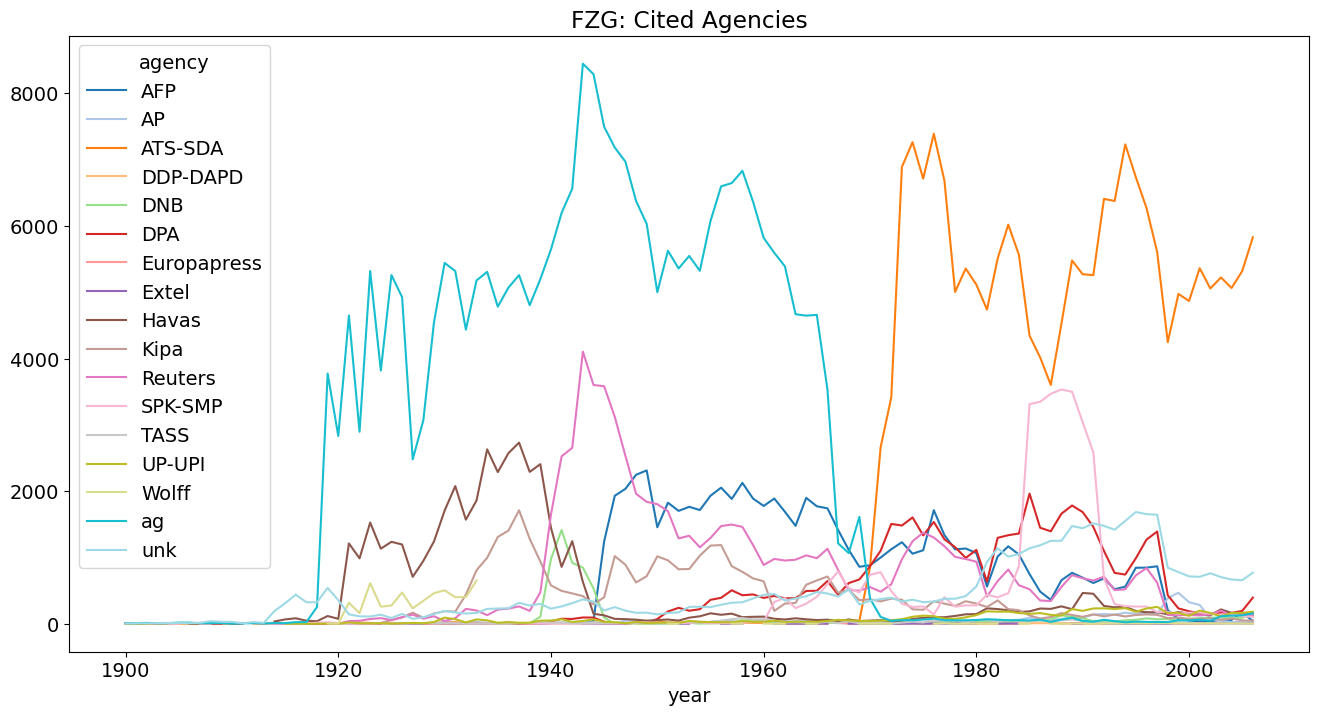

In [96]:
matplotlib.rcParams.update({'font.size': 14})
FZG = all_mentions[(all_mentions['newspaper'] == 'FZG') & (all_mentions['decade'] >= 1900)]
FZG_grouped = FZG[['agency', 'year', 'article']].groupby(['agency', 'year']).count().reset_index().pivot(columns='agency', index='year')
FZG_grouped.columns = FZG_grouped.columns.droplevel()

FZG_grouped.plot.line(figsize=(16,8), cmap='tab20', title="FZG: Cited Agencies")

<Axes: title={'center': 'DTT: Cited Agencies'}, xlabel='year'>

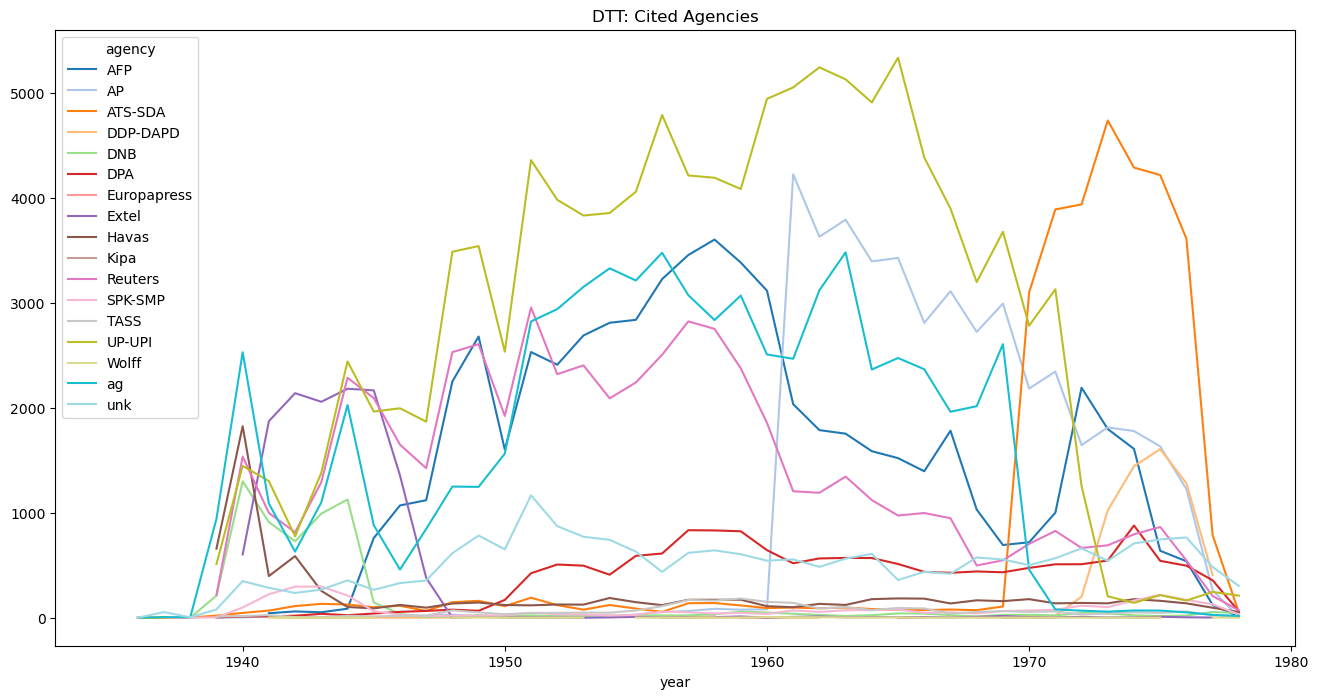

In [99]:
DTT = all_mentions[(all_mentions['newspaper'] == 'DTT') & (all_mentions['decade'] >= 1900)]
DTT_grouped = DTT[['agency', 'year', 'article']].groupby(['agency', 'year']).count().reset_index().pivot(columns='agency', index='year')
DTT_grouped.columns = DTT_grouped.columns.droplevel()
DTT_grouped.plot.line(figsize=(16,8), cmap='tab20', title="DTT: Cited Agencies")

<Axes: title={'center': 'NZZ: Cited Agencies'}, xlabel='year'>

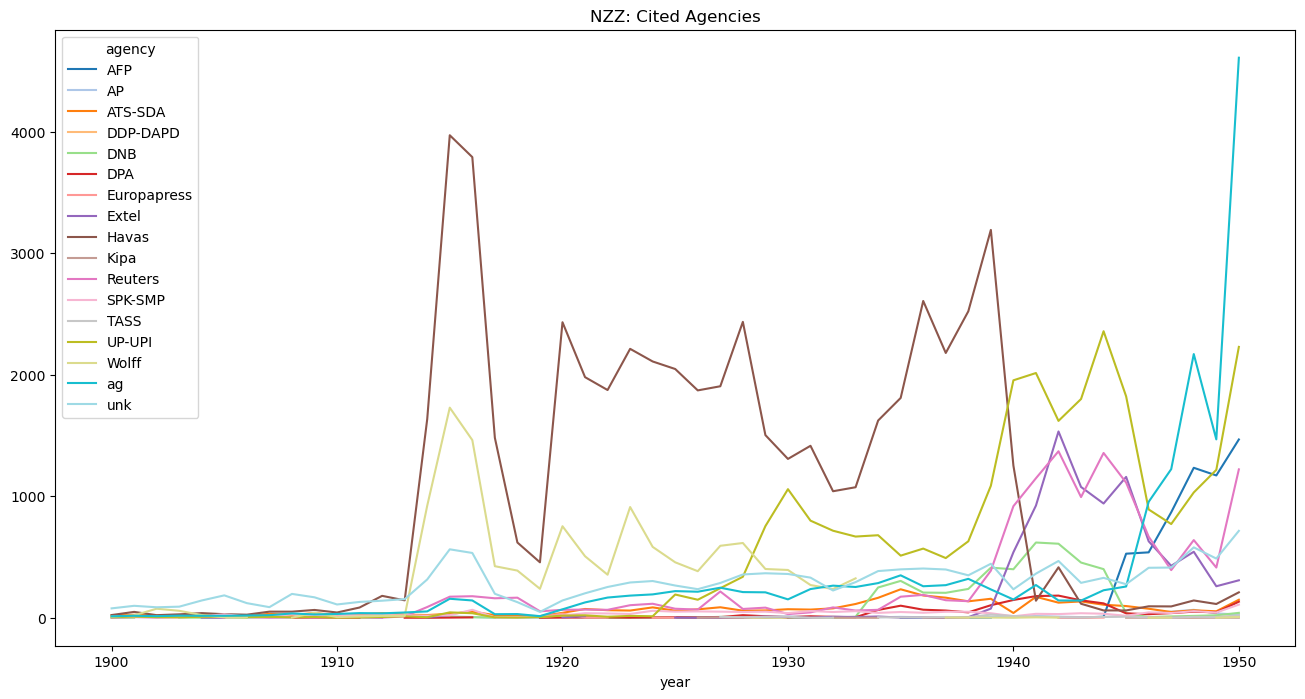

In [67]:
NZZ = all_mentions[(all_mentions['newspaper'] == 'NZZ') & (all_mentions['decade'] >=  1900)]
NZZ_grouped = NZZ[['agency', 'year', 'article']].groupby(['agency', 'year']).count().reset_index().pivot(columns='agency', index='year')
NZZ_grouped.columns = NZZ_grouped.columns.droplevel()
NZZ_grouped.plot.line(figsize=(16,8), cmap='tab20', title="NZZ: Cited Agencies")

In [98]:
matplotlib.rcParams.update({'font.size': 10})

## Havas after 1940

Text(0.5, 1.0, 'Havas over time')

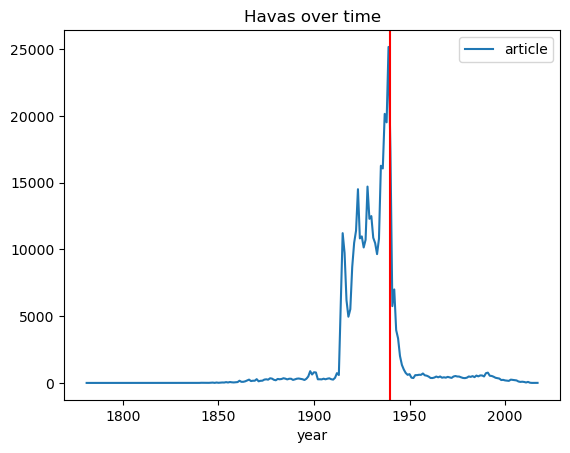

In [78]:
ax = all_mentions.loc[all_mentions['agency'] == 'Havas', ['year', 'article']].groupby('year').count().plot.line()
ax.axvline(1940, color='red')
ax.set_title('Havas over time')

In [88]:
Havas1941 = all_mentions[(all_mentions['agency'] == 'Havas') & (all_mentions['year'].isin(list(range(1941, 1950))))]
Havas1941.head()

,entity,surface,qid,lSentenceOffset,rSentenceOffset,sentence_idx:,lArticleOffset,rArticleOffset,id,article,newspaper,date,year,decade,agency,language,country
717,org.ent.pressagency.Havas,Renier,Q2826560,3,9,1,62,68,JDG-1944-01-12-a-i0081:1:3:9:62:68:newsag:bert_fr,JDG-1944-01-12-a-i0081,JDG,1944-01-12,1944,1940,Havas,fr,CH
769,org.ent.pressagency.Havas,ag,Q2826560,1,3,2,62,64,GDL-1942-04-29-a-i0019:2:1:3:62:64:newsag:bert_fr,GDL-1942-04-29-a-i0019,GDL,1942-04-29,1942,1940,Havas,fr,CH
1715,org.ent.pressagency.Havas,Reuter,Q2826560,69,75,9,1499,1505,EXP-1948-04-05-a-i0003:9:69:75:1499:1505:newsa...,EXP-1948-04-05-a-i0003,EXP,1948-04-05,1948,1940,Havas,fr,CH
2223,org.ent.pressagency.Havas,Reuter,Q2826560,63,69,0,63,69,EXP-1944-02-07-a-i0088:0:63:69:63:69:newsag:be...,EXP-1944-02-07-a-i0088,EXP,1944-02-07,1944,1940,Havas,fr,CH
2374,org.ent.pressagency.Havas,Ag,Q2826560,97,99,0,97,99,GDL-1942-02-13-a-i0021:0:97:99:97:99:newsag:be...,GDL-1942-02-13-a-i0021,GDL,1942-02-13,1942,1940,Havas,fr,CH


In [89]:
Havas1941['surface'].value_counts()[:20]

Havas        6112
Ag           4934
ag           4570
Stefani      1565
Agentur      1019
Ofi           913
Reuter        545
Renier        496
Telepress     461
Agence        458
Saas          336
suivre        246
Sp            207
Etas          129
Hauas         110
DNB           107
Haoas          96
Eeuter         93
Presa          91
Reuler         86
Name: surface, dtype: int64

In [90]:
Havas1941.loc[Havas1941['surface'].str.startswith('Ha'), 'surface'].value_counts()[:20]

Havas        6112
Hauas         110
Haoas          96
Hava           44
HavaZ          19
Havns          14
Havae          13
Ha             10
Hanas          10
Havard          7
Hayas           7
Haig            6
Havoz           6
Hava8           5
Havaa           5
Havos           4
Havai           4
Hava3           4
Havekotte       3
HavasOfi        3
Name: surface, dtype: int64

In [91]:
Havas1941[Havas1941['surface'] == 'Havas'].sample(10, random_state=1)

,entity,surface,qid,lSentenceOffset,rSentenceOffset,sentence_idx:,lArticleOffset,rArticleOffset,id,article,newspaper,date,year,decade,agency,language,country
4649,org.ent.pressagency.Havas,Havas,Q2826560,2,7,48,6332,6337,DTT-1942-08-12-a-i0036:48:2:7:6332:6337:newsag...,DTT-1942-08-12-a-i0036,DTT,1942-08-12,1942,1940,Havas,de,CH
3007249,org.ent.pressagency.Havas,Havas,Q2826560,2,7,40,2645,2650,FZG-1941-11-15-a-i0097:40:2:7:2645:2650:newsag...,FZG-1941-11-15-a-i0097,FZG,1941-11-15,1941,1940,Havas,de,CH
3393035,org.ent.pressagency.Havas,Havas,Q2826560,2,7,8,980,985,LLE-1942-05-29-a-i0024:8:2:7:980:985:newsag:be...,LLE-1942-05-29-a-i0024,LLE,1942-05-29,1942,1940,Havas,fr,CH
3571530,org.ent.pressagency.Havas,Havas,Q2826560,2,7,36,4935,4940,IMP-1942-06-30-a-i0101:36:2:7:4935:4940:newsag...,IMP-1942-06-30-a-i0101,IMP,1942-06-30,1942,1940,Havas,fr,CH
2356627,org.ent.pressagency.Havas,Havas,Q2826560,3,8,1,52,57,JDG-1942-09-05-a-i0020:1:3:8:52:57:newsag:bert_fr,JDG-1942-09-05-a-i0020,JDG,1942-09-05,1942,1940,Havas,fr,CH
460242,org.ent.pressagency.Havas,Havas,Q2826560,112,117,4,941,946,EXP-1941-04-02-a-i0047:4:112:117:941:946:newsa...,EXP-1941-04-02-a-i0047,EXP,1941-04-02,1941,1940,Havas,fr,CH
2794232,org.ent.pressagency.Havas,Havas,Q2826560,1,6,12,913,918,LSE-1942-05-20-a-i0033:12:1:6:913:918:newsag:b...,LSE-1942-05-20-a-i0033,LSE,1942-05-20,1942,1940,Havas,fr,CH
4508699,org.ent.pressagency.Havas,Havas,Q2826560,2,7,43,7376,7381,DTT-1942-03-09-a-i0025:43:2:7:7376:7381:newsag...,DTT-1942-03-09-a-i0025,DTT,1942-03-09,1942,1940,Havas,de,CH
4377980,org.ent.pressagency.Havas,Havas,Q2826560,2,7,1,83,88,LLE-1942-06-10-a-i0007:1:2:7:83:88:newsag:bert_fr,LLE-1942-06-10-a-i0007,LLE,1942-06-10,1942,1940,Havas,fr,CH
119710,org.ent.pressagency.Havas,Havas,Q2826560,102,107,0,102,107,EXP-1941-09-13-a-i0006:0:102:107:102:107:newsa...,EXP-1941-09-13-a-i0006,EXP,1941-09-13,1941,1940,Havas,fr,CH


In [92]:
Havas1941[Havas1941['surface'] == 'Havas'].sample(10, random_state=1)['article']

4649       DTT-1942-08-12-a-i0036
3007249    FZG-1941-11-15-a-i0097
3393035    LLE-1942-05-29-a-i0024
3571530    IMP-1942-06-30-a-i0101
2356627    JDG-1942-09-05-a-i0020
460242     EXP-1941-04-02-a-i0047
2794232    LSE-1942-05-20-a-i0033
4508699    DTT-1942-03-09-a-i0025
4377980    LLE-1942-06-10-a-i0007
119710     EXP-1941-09-13-a-i0006
Name: article, dtype: object

- DTT-1942-08-12-a-i0036:  
    - Paris , 11 . Aug . ( Havas-OFI . ) Die deutschen Polizeibehörden veröffentlichen folgende Bekanntmachung :
- FZG-1941-11-15-a-i0097:
    -  Vichy , 15 . Nov . ag . ( Havas » Ofi . ) Von zuftändiger Stelle wird gemeldet , daß
- LLE-1942-05-29-a-i0024:
    -  ( Havas . ) — Le minislère de l air brésilien publie le communiqué suivant :
- IMP-1942-06-30-a-i0101: TOURS, 30. — Havas-Ofi — On a arrêté à Saint-Pierre-des-Corps
- JDG-1942-09-05-a-i0020: Stockholm, 5. — (Havas-Ofi.) La tentative flç
- EXP-1941-04-02-a-i0047: BELGBADE, 2 (Havas). — La question des modalités de la 
- LSE-1942-05-20-a-i0033: Paris, 19 mai. (Havas-Ofi.
- DTT-1942-03-09-a-i0025: Washington , 8 . März . ( Havas-OFI . ) Das
- LLE-1942-06-10-a-i0007: Washington , 10 juin . ( Havas . ) — L amiral Leahy a dit , au cours
    - cited by EXP-1942-06-11-a-i0010 as Havas-O.F.I.
- EXP-1941-09-13-a-i0006: ANKARA, 12 (Havas-O. F. L). — Un tremblement de terre


### -> Havas-OFI